In [4]:
#import necesary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from matplotlib import pyplot as plt
import matplotlib.image as img

In [7]:
# 2) import the train data
df=pd.read_csv('Week7_train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.shape

(42000, 785)

In [11]:
# 4. Select only 10 % of the data form experiment
df_sample=df.sample(frac=0.1,random_state=42)

In [12]:
# 5. Print shape of selected dataset
df_sample.shape

(4200, 785)

In [13]:
df_sample.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# 7. Find no of unique class labels (another way )
unique=df_sample['label'].nunique()
unique

10

In [17]:
# 8. Print the no of examples for each class label (one way)
df_sample['label'].value_counts()

label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64

In [18]:
#  9. Prepare x and y
x=df_sample.drop(columns='label')
y=df_sample['label']

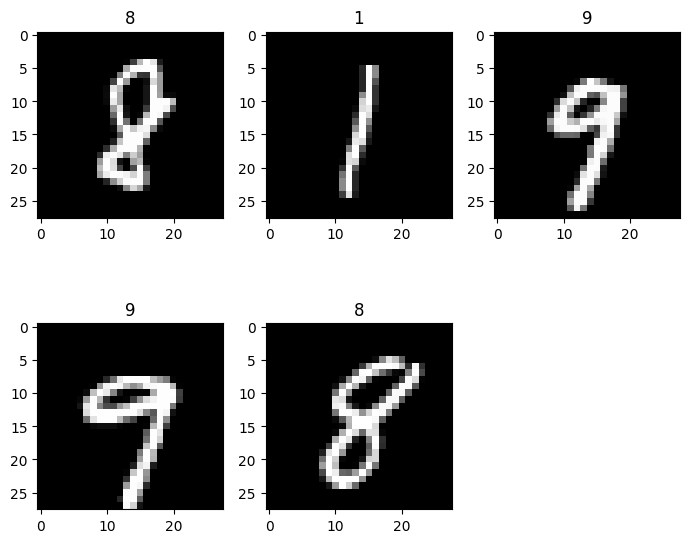

In [23]:
# Visualize the image of the first 4 in x and print the class label


# subplots creates grid of plots with given first two dimension parameters
# axes gives a 2d array of references two each subplot in grid to plot
fig,axes=plt.subplots(2,3,figsize=(7,6))
axes=axes.flatten()
for i in range(5):
    cur_ax=axes[i]
    im=x.iloc[i].values.reshape(28,28)
    cur_ax.imshow(im,cmap='gray')
    cur_ax.set_title(f"{y.iloc[i]}")
plt.delaxes(axes[-1])
    
plt.tight_layout()
plt.show()

In [24]:
#  11. Split the train dataset into training set(75%) & validation set(25%)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=42)
x_train.shape

(3150, 784)

In [27]:


# 12. Fit KNN classifies to training dat
# 13. default parameters n_neighbors=5, metric="minkowski", p = 2

# Note :  using minkowski we can perform both metrics -> manhattan and euclidean
# to specify which metrics to model p - power parameter is given
#  p is given only when "minkowski" metric is used
#  p = 1   -> "manhattan
#  p = 2  -> "euclidean"
model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
# 14. Predic the validation set results 
y_pred=model.predict(x_test)
print(y_pred[:5])

[9 3 6 7 5]


In [30]:
# 15.  Print the confusion matrix 
confusion_matrix(y_test,y_pred)

array([[ 97,   0,   0,   1,   0,   1,   2,   0,   0,   0],
       [  0, 118,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   6,  81,   0,   0,   0,   0,   3,   0,   0],
       [  0,   0,   1, 122,   0,   4,   0,   1,   1,   3],
       [  0,   0,   0,   0,  88,   0,   2,   0,   0,   5],
       [  0,   1,   0,   2,   0,  80,   1,   1,   0,   0],
       [  0,   1,   0,   0,   0,   0,  98,   0,   0,   0],
       [  0,   9,   1,   0,   0,   0,   0, 104,   0,   4],
       [  0,   5,   1,   3,   0,   1,   2,   2,  89,   3],
       [  1,   2,   0,   1,   3,   0,   0,   5,   0,  94]])

In [35]:
# 16. Print classitfication report and accuracy
print(classification_report(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       101
           1       0.83      1.00      0.91       118
           2       0.96      0.90      0.93        90
           3       0.95      0.92      0.93       132
           4       0.97      0.93      0.95        95
           5       0.93      0.94      0.94        85
           6       0.93      0.99      0.96        99
           7       0.90      0.88      0.89       118
           8       0.99      0.84      0.91       106
           9       0.86      0.89      0.87       106

    accuracy                           0.92      1050
   macro avg       0.93      0.92      0.93      1050
weighted avg       0.93      0.92      0.92      1050

accuracy: 0.9247619047619048


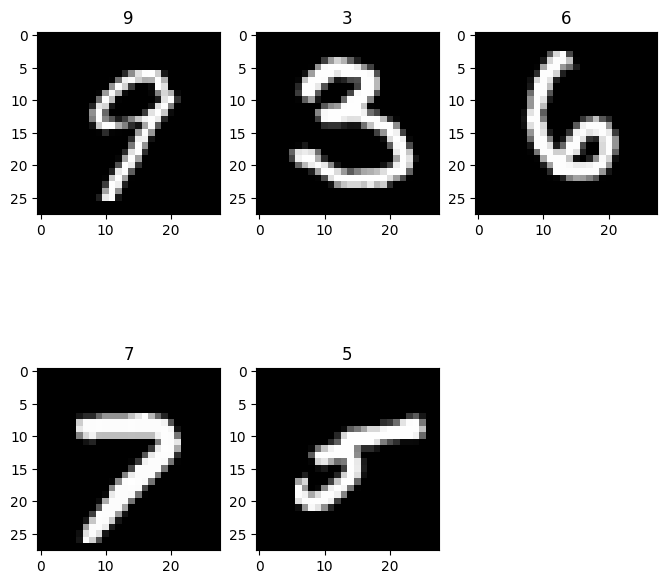

In [37]:
# 17. Visulaize the image of the first digits in x_test also print the predicted
plt.figure(figsize=(8,8))
for i in range(5):
    plt.subplot(2,3,i+1)
    img=x_test.iloc[i].values.reshape(28,28)
    plt.imshow(img,cmap='gray')
    plt.title(f"{y_pred[i]}")
plt.show()